In [57]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [58]:
df = pd.read_csv("List of Countries by Sugarcane Production.csv")
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [59]:
df.shape

(103, 7)

# Data Cleaning

In [60]:
df['Production (Tons)'] = df['Production (Tons)'].str.replace('.' , '')
df["Production per Person (Kg)"] = df["Production per Person (Kg)"].str.replace(".","").str.replace(",",".")
df["Acreage (Hectare)"] = df["Acreage (Hectare)"].str.replace(".","")
df["Yield (Kg / Hectare)"]= df["Yield (Kg / Hectare)"].str.replace(".","").str.replace(",",".")

In [61]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [62]:
df = df.drop( "Unnamed: 0", axis = 1)

In [63]:
df.rename(columns= {"Production (Tons)": "Production(Tons)"}, inplace = True)
df.rename(columns= {"Production per Person (Kg)": "Production_per_person(Kg)"}, inplace = True)
df.rename(columns= {"Acreage (Hectare)": "Acreage(Hectare)"}, inplace = True)
df.rename(columns= {"Yield (Kg / Hectare)": "Yield(Kg/Hectare)"}, inplace = True)

In [64]:
df.head()

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879


In [65]:
df.isna().sum()

Country                      0
Continent                    0
Production(Tons)             0
Production_per_person(Kg)    0
Acreage(Hectare)             1
Yield(Kg/Hectare)            1
dtype: int64

In [66]:
df[df["Acreage(Hectare)"].isnull()]

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
99,Djibouti,Africa,53,51,NaN,NaN


In [67]:
df = df.dropna().reset_index().drop("index", axis = 1)
df

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879
...,...,...,...,...,...,...
97,Spain,Europe,394,8,9,43596.5
98,Lebanon,Asia,97,16,3,28386.4
99,Singapore,Asia,50,9,2,25
100,Samoa,Oceania,12,6,1,11949.8


In [68]:
df.nunique()

Country                      102
Continent                      6
Production(Tons)             102
Production_per_person(Kg)    101
Acreage(Hectare)             101
Yield(Kg/Hectare)            102
dtype: int64

In [69]:
df.dtypes

Country                      object
Continent                    object
Production(Tons)             object
Production_per_person(Kg)    object
Acreage(Hectare)             object
Yield(Kg/Hectare)            object
dtype: object

In [70]:
df["Production(Tons)"] = df["Production(Tons)"].astype(float)
df["Production_per_person(Kg)"] = df["Production_per_person(Kg)"].astype(float)
df["Acreage(Hectare)"] = df["Acreage(Hectare)"].astype(float)
df["Yield(Kg/Hectare)"] = df["Yield(Kg/Hectare)"].astype(float)
df.dtypes

Country                       object
Continent                     object
Production(Tons)             float64
Production_per_person(Kg)    float64
Acreage(Hectare)             float64
Yield(Kg/Hectare)            float64
dtype: object

In [71]:
df.describe()

,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
count,1.020000e+02,102.000000,1.020000e+02,102.000000
mean,1.850372e+07,112952.435755,2.498981e+05,52628.078431
std,8.419149e+07,176651.341929,1.137003e+06,30504.676683
min,1.000000e+00,0.000000,0.000000e+00,10.000000
25%,6.251875e+04,3671.910000,1.104000e+03,29072.025000
50%,1.440044e+06,25572.500000,1.655800e+04,54108.950000
75%,6.426824e+06,146384.750000,8.047400e+04,73282.700000
max,7.686784e+08,951087.000000,1.022620e+07,129049.300000


## Univariate Analysis

In [72]:
df["Continent"].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

#### Number of countries producing sugarcane from each continent.

<Axes: xlabel='Continent', ylabel='count'>

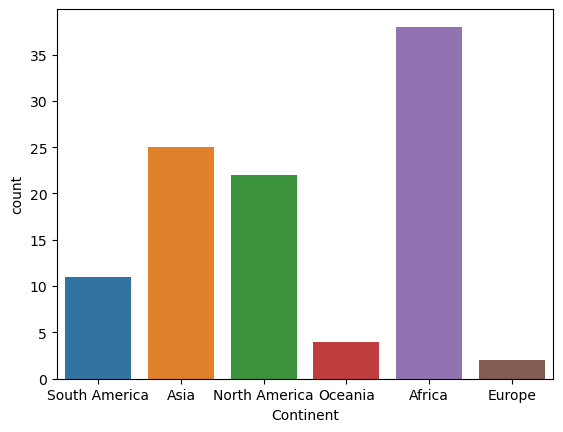

In [73]:
sns.countplot(data = df, x = "Continent")

#### Africa produces the most Sugarcane

### Checking for Outliers using Boxplot

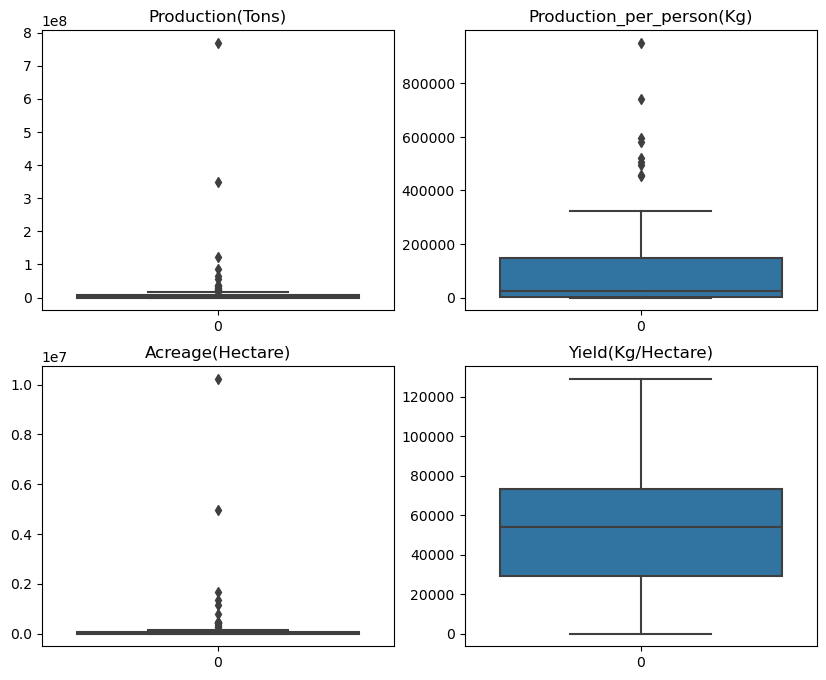

In [74]:
plt.figure(figsize = (10,8))
plt.subplot(2,2,1)
sns.boxplot(df["Production(Tons)"])
plt.title("Production(Tons)")
plt.subplot(2,2,2)
sns.boxplot(df["Production_per_person(Kg)"])
plt.title("Production_per_person(Kg)")
plt.subplot(2,2,3)
sns.boxplot(df["Acreage(Hectare)"])
plt.title("Acreage(Hectare)")
plt.subplot(2,2,4)
sns.boxplot(df["Yield(Kg/Hectare)"])
plt.title("Yield(Kg/Hectare)")
plt.show()

#### We can clearly see the outliers in the Boxplot. Let's check the data distribution using distplot.

### Data Distribution using Distplot

/tmp/ipykernel_17712/1909675950.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Production(Tons)"])
/home/tanya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_17712/1909675950.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function 

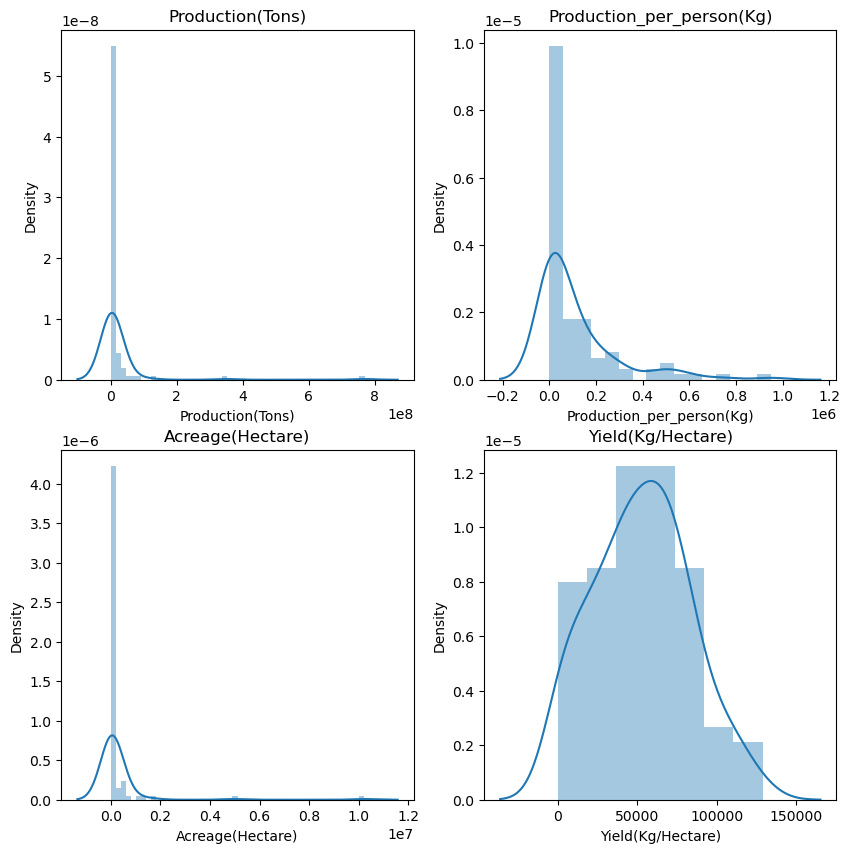

In [75]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
sns.distplot(df["Production(Tons)"])
plt.title("Production(Tons)")
plt.subplot(2,2,2)
sns.distplot(df["Production_per_person(Kg)"])
plt.title("Production_per_person(Kg)")
plt.subplot(2,2,3)
sns.distplot(df["Acreage(Hectare)"])
plt.title("Acreage(Hectare)")
plt.subplot(2,2,4)
sns.distplot(df["Yield(Kg/Hectare)"])
plt.title("Yield(Kg/Hectare)")
plt.show()

#### We can't remove these outliers as they give us the important information about the sugarcane production at different countries.

## Bivariate Analysis

In [76]:
df.head()

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


### Country that produces maximum Sugarcane

In [77]:
df_new = df[["Country","Production(Tons)"]]
df_new.sort_values(by ="Production(Tons)",ascending = False)
df_new

,Country,Production(Tons)
0,Brazil,768678382.0
1,India,348448000.0
2,China,123059739.0
3,Thailand,87468496.0
4,Pakistan,65450704.0
...,...,...
97,Spain,394.0
98,Lebanon,97.0
99,Singapore,50.0
100,Samoa,12.0


In [78]:
df_new["Percentage_Production"] = (df_new["Production(Tons)"]*100)/df_new["Production(Tons)"].sum()
df_new[df_new["Percentage_Production"]>0.5]


/tmp/ipykernel_17712/2368173209.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["Percentage_Production"] = (df_new["Production(Tons)"]*100)/df_new["Production(Tons)"].sum()


,Country,Production(Tons),Percentage_Production
0,Brazil,768678382.0,40.727285
1,India,348448000.0,18.462001
2,China,123059739.0,6.520138
3,Thailand,87468496.0,4.634389
4,Pakistan,65450704.0,3.467809
5,Mexico,56446821.0,2.990751
6,Colombia,36951213.0,1.957805
7,Australia,34403004.0,1.822792
8,Guatemala,33533403.0,1.776718
9,United States of America,29926210.0,1.585596


#### Replacing the countries with other countries if the Percentage_Production is less than 2

In [79]:
df_new['Country_to_display'] = df['Country']
df_new["Country_to_display"] = np.where(df_new["Percentage_Production"]<0.5,"Other_Countries",df_new["Country_to_display"])
df_new

/tmp/ipykernel_17712/2149156690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Country_to_display'] = df['Country']
/tmp/ipykernel_17712/2149156690.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["Country_to_display"] = np.where(df_new["Percentage_Production"]<0.5,"Other_Countries",df_new["Country_to_display"])


,Country,Production(Tons),Percentage_Production,Country_to_display
0,Brazil,768678382.0,4.072729e+01,Brazil
1,India,348448000.0,1.846200e+01,India
2,China,123059739.0,6.520138e+00,China
3,Thailand,87468496.0,4.634389e+00,Thailand
4,Pakistan,65450704.0,3.467809e+00,Pakistan
...,...,...,...,...
97,Spain,394.0,2.087551e-05,Other_Countries
98,Lebanon,97.0,5.139401e-06,Other_Countries
99,Singapore,50.0,2.649176e-06,Other_Countries
100,Samoa,12.0,6.358022e-07,Other_Countries


In [80]:
df_new2 = df_new.groupby("Country_to_display")["Percentage_Production"].sum().reset_index()
df_new2

,Country_to_display,Percentage_Production
0,Argentina,1.165151
1,Australia,1.822792
2,Brazil,40.727285
3,China,6.520138
4,Colombia,1.957805
5,Cuba,1.000910
6,Egypt,0.835042
7,Guatemala,1.776718
8,India,18.462001
9,Indonesia,1.438970


In [85]:
df_new3 = df_new2.sort_values(by = "Percentage_Production",ascending = False)
df_new3

,Country_to_display,Percentage_Production
2,Brazil,40.727285
8,India,18.462001
12,Other_Countries,7.692384
3,China,6.520138
17,Thailand,4.634389
13,Pakistan,3.467809
10,Mexico,2.990751
4,Colombia,1.957805
1,Australia,1.822792
7,Guatemala,1.776718


#### Pie Chart

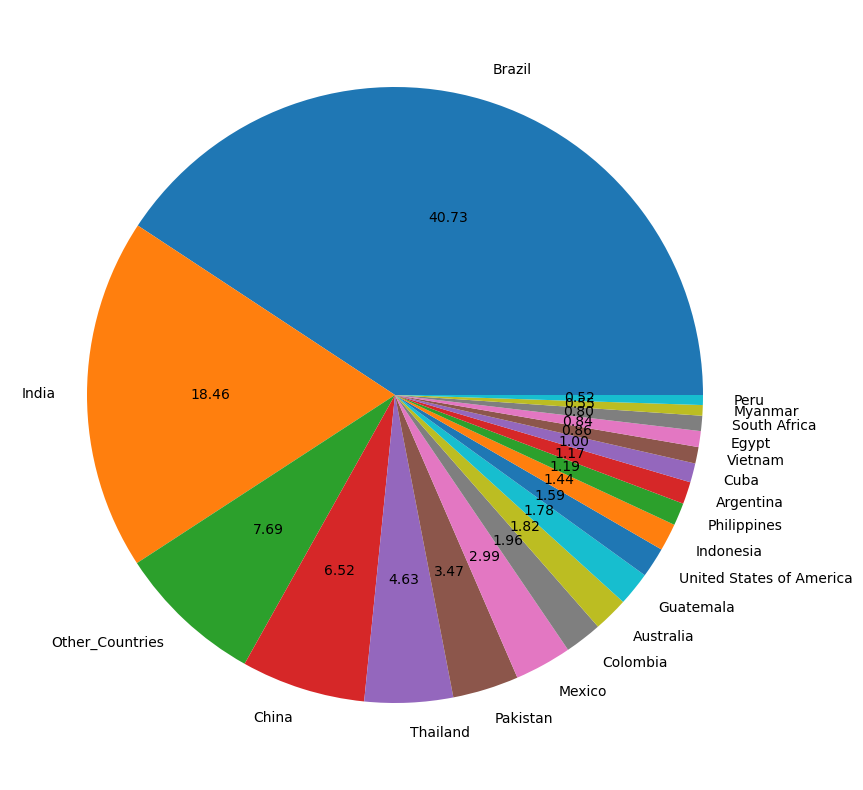

In [86]:
plt.figure(figsize = (10,10))
plt.pie(df_new3["Percentage_Production"],labels = df_new3["Country_to_display"],autopct = "%.2f")
plt.show()

#### Bar Graph

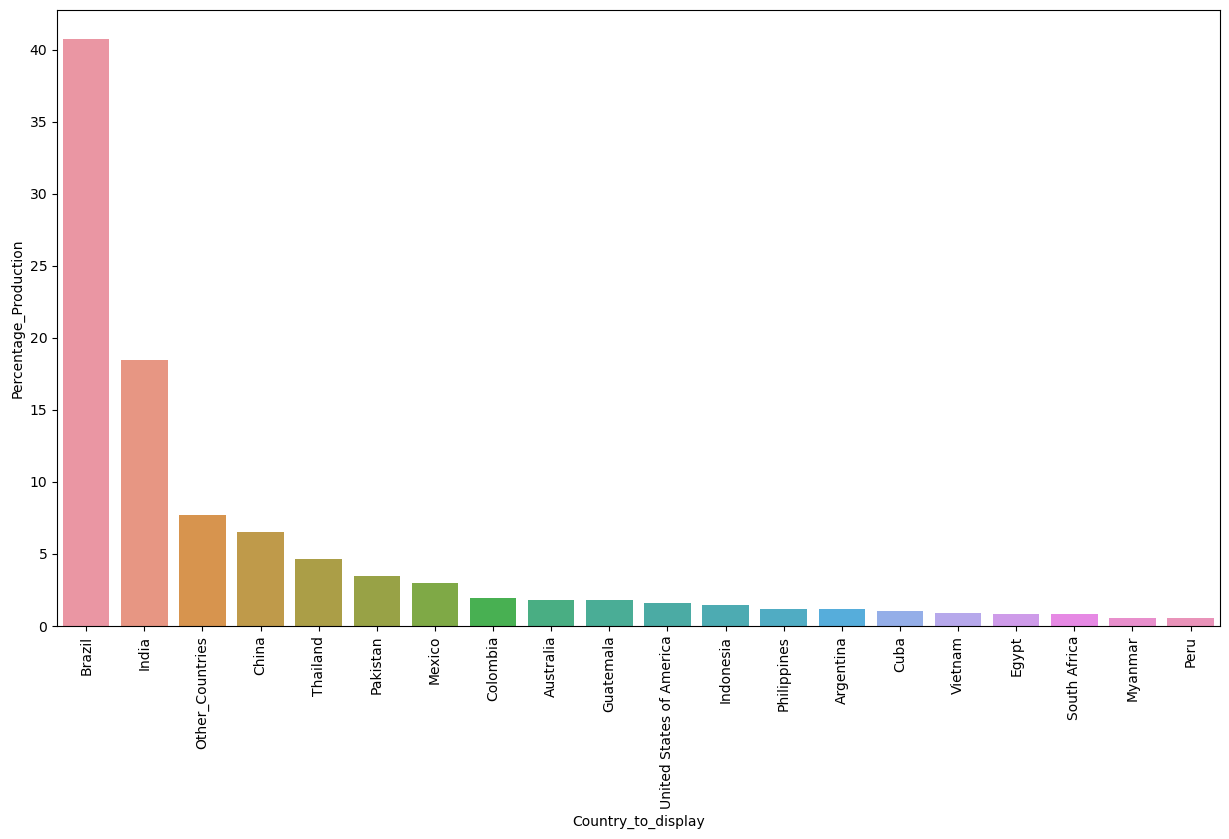

In [88]:
plt.figure(figsize = (15,8))
sns.barplot(data = df_new3, x = "Country_to_display", y = "Percentage_Production")
plt.xticks(rotation=90)
plt.show()

#### The country "Brazil" produces maximum sugarcane out of all countries.

### Country that has the highest land

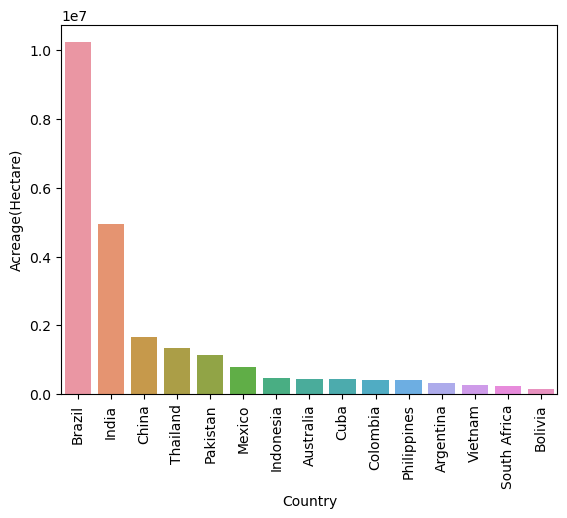

In [91]:
df_acr = df.sort_values("Acreage(Hectare)", ascending = False).head(15)
ax = sns.barplot(data = df_acr,  x= "Country", y = "Acreage(Hectare)")
ax.set_xticklabels(ax.get_xticklabels(),rotation =90)
plt.show()

#### Brazil has the highest Land

### Country that has the highest yield per hectare

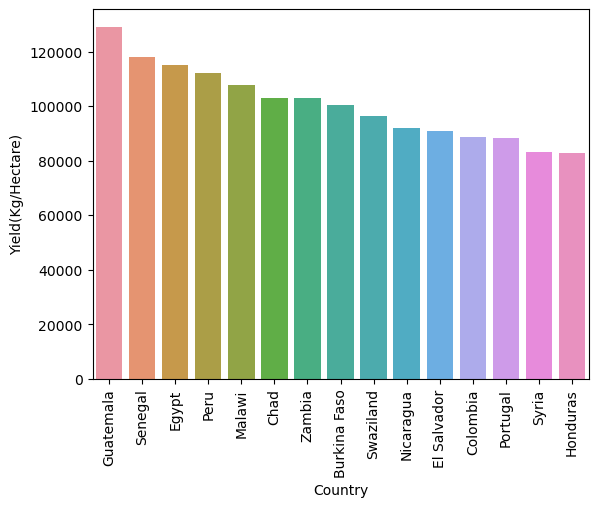

In [92]:
df_yield = df.sort_values("Yield(Kg/Hectare)", ascending = False).head(15)
ax = sns.barplot(data = df_yield,  x= "Country", y = "Yield(Kg/Hectare)")
ax.set_xticklabels(ax.get_xticklabels(),rotation =90)
plt.show()

#### Guatemala has the highest yield(kg/hectare)

### Country that has the highest production per person

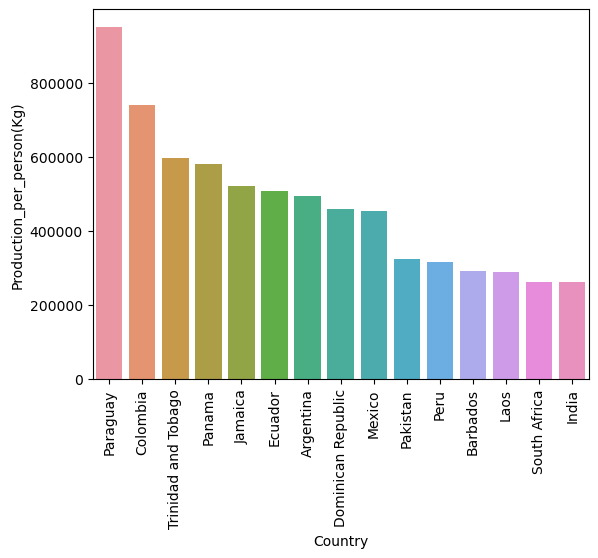

In [93]:
df_yield = df.sort_values("Production_per_person(Kg)", ascending = False).head(15)
ax = sns.barplot(data = df_yield,  x= "Country", y = "Production_per_person(Kg)")
ax.set_xticklabels(ax.get_xticklabels(),rotation =90)
plt.show()

#### Production per Person is highest in Paraguay

### Correlation

<Axes: >

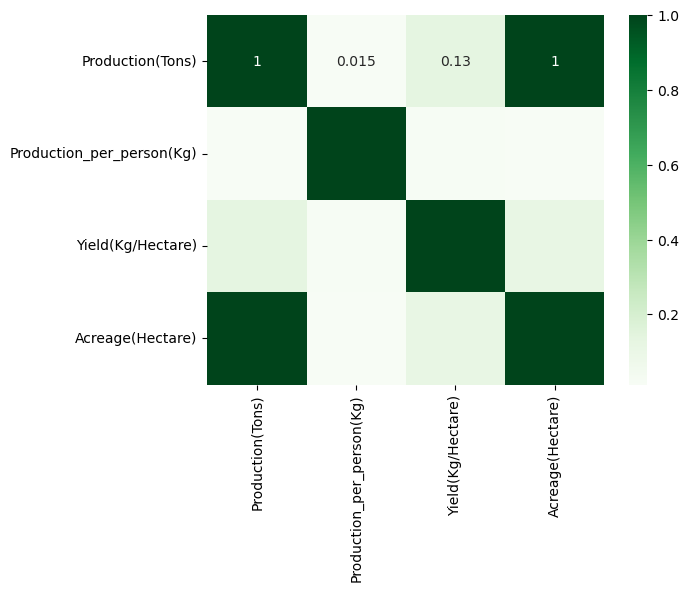

In [100]:
sns.heatmap(df[["Production(Tons)","Production_per_person(Kg)","Yield(Kg/Hectare)","Acreage(Hectare)",]].corr(), annot = True, cmap="Greens")

### Do countries with the highest land produce more sugarcane?

<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

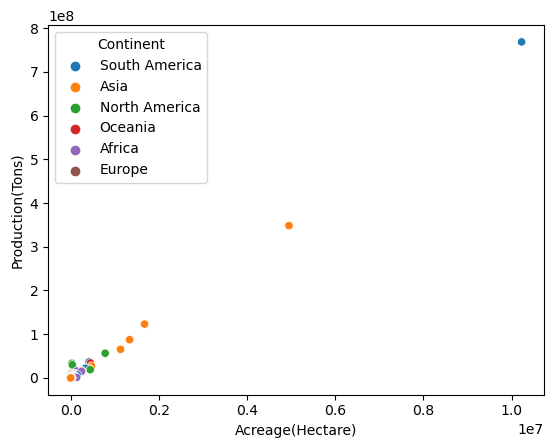

In [101]:
sns.scatterplot(data = df, x = "Acreage(Hectare)", y = "Production(Tons)", hue = "Continent" )

#### We can see that overall increase in land increases the production

### Do countries which yield more sugarcane per hectare produces more sugarcane in total?

<Axes: xlabel='Yield(Kg/Hectare)', ylabel='Production(Tons)'>

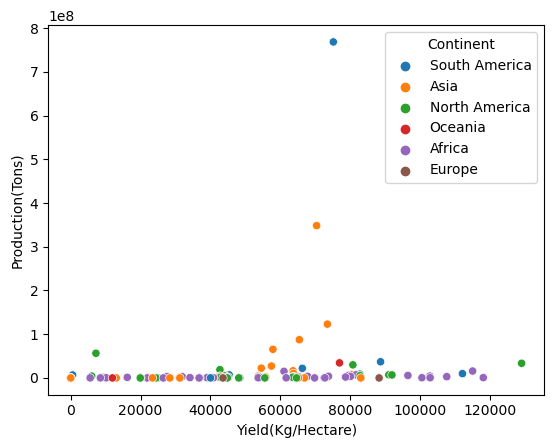

In [103]:
sns.scatterplot(data = df, x = "Yield(Kg/Hectare)" , y = "Production(Tons)", hue = "Continent")

## Analysis for Continents

In [106]:
df_continent = df.groupby("Continent").sum()
df_continent["number_of_countries"] = df.groupby("Continent").count()["Country"]
df_continent


,Country,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare),number_of_countries
Continent,,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681472.0,2332636.293,1439089.0,2142107.5,38
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,1857769.303,10608319.0,1171871.4,25
Europe,PortugalSpain,5823.0,536.000,71.0,131870.9,2
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,3796081.508,1581983.0,1082602.4,22
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,28593.605,490909.0,162419.1,4
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,3505531.738,11369236.0,677192.7,11


### Which Continent produces the maximum sugarcane?

<Axes: xlabel='Continent'>

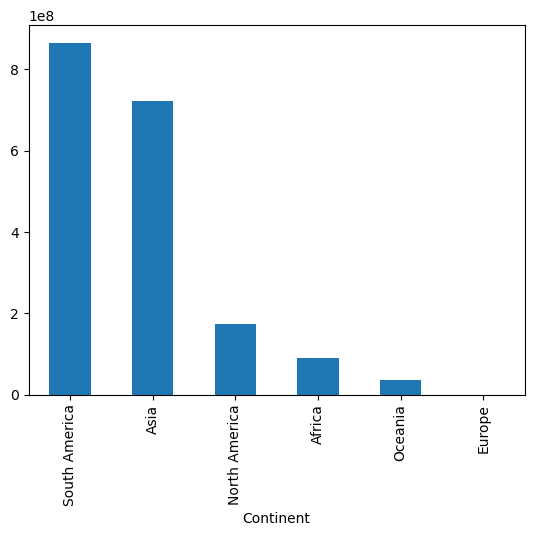

In [111]:
df_continent["Production(Tons)"].sort_values(ascending =  False).plot(kind = "bar")

#### South America is the Continent with the maximum sugarcane production

### Do number of countries in a Continent effects production of sugarcane?


/home/tanya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/tanya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


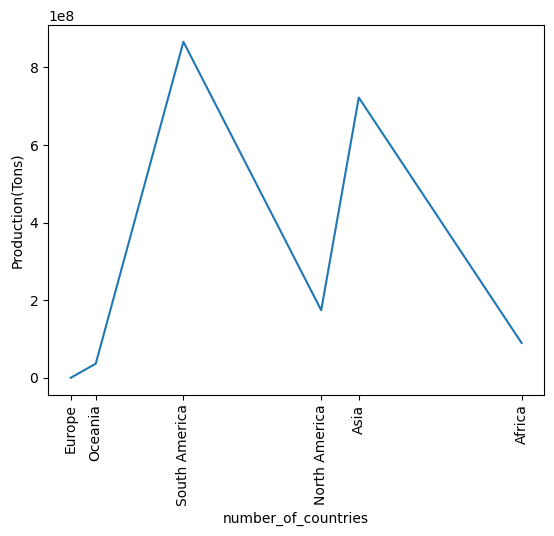

In [112]:
continent_names = df_continent.index.to_list()
sns.lineplot(data = df_continent,x = "number_of_countries", y= "Production(Tons)" )
plt.xticks(df_continent["number_of_countries"], continent_names, rotation =90)
plt.show()

### Do continent with highest land produces more sugarcane?


/home/tanya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/tanya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

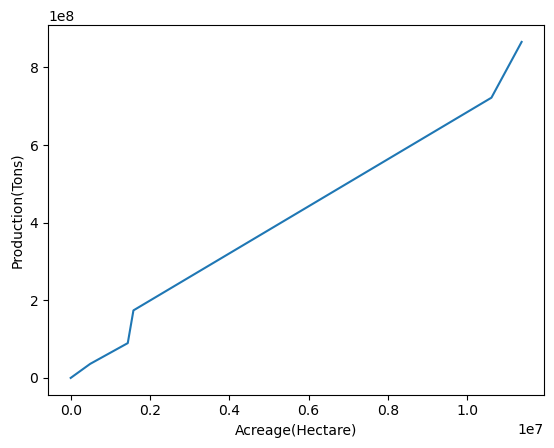

In [113]:
sns.lineplot(data = df_continent,x = "Acreage(Hectare)", y= "Production(Tons)" )

## Production distribution by continent

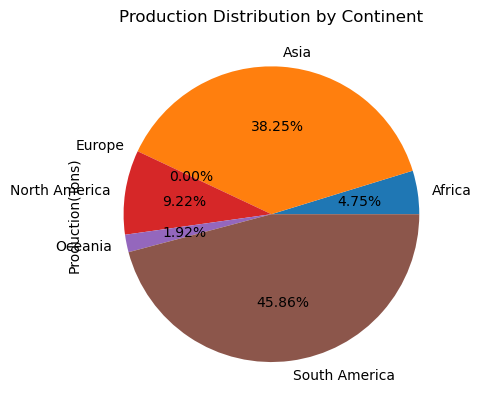

In [114]:
df_continent["Production(Tons)"].plot(kind = "pie", autopct = "%.2f%%")
plt.title('Production Distribution by Continent')
plt.show()

## Correlation for continent


In [117]:
df_continent[["Production(Tons)","Production_per_person(Kg)","Yield(Kg/Hectare)","Acreage(Hectare)",]].corr()

,Production(Tons),Production_per_person(Kg),Yield(Kg/Hectare),Acreage(Hectare)
Production(Tons),1.000000,0.522211,0.091201,0.994897
Production_per_person(Kg),0.522211,1.000000,0.542961,0.463215
Yield(Kg/Hectare),0.091201,0.542961,1.000000,0.111166
Acreage(Hectare),0.994897,0.463215,0.111166,1.000000
